In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Salary_Data.csv')

In [4]:
df.sample(10)

,YearsExperience,Salary
6,3.0,60150
26,9.5,116969
27,9.6,112635
2,1.5,37731
12,4.0,56957
29,10.5,121872
9,3.7,57189
19,6.0,93940
23,8.2,113812
14,4.5,61111


In [5]:
df.shape

(30, 2)

In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


Here, mean of Year of experience is 5.31, mean of salary is 76003. max year of experience is 10.5 and max salary is 122391.

In [7]:
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


<Axes: >

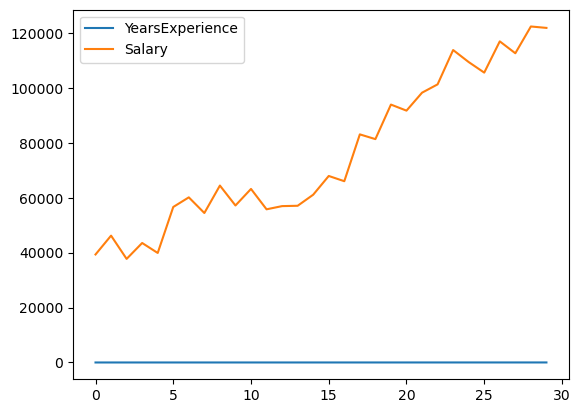

In [9]:
df.plot()

In [10]:
cn = df.corr()
cn

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: >

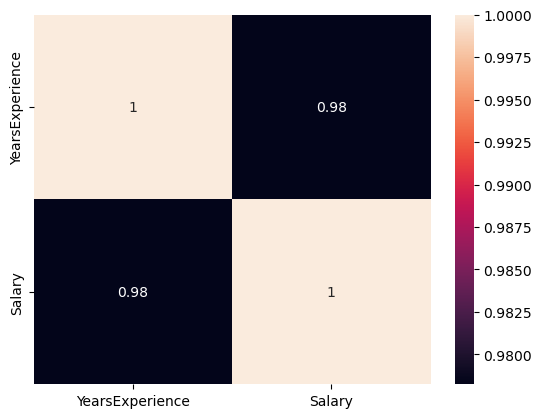

In [11]:
import seaborn as sns
sns.heatmap(cn, annot=True)

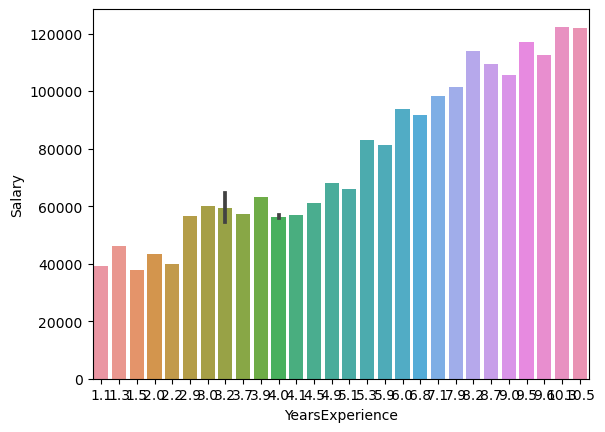

In [12]:
sns.barplot(x='YearsExperience', y='Salary', data=df)
plt.show()

D:\new\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


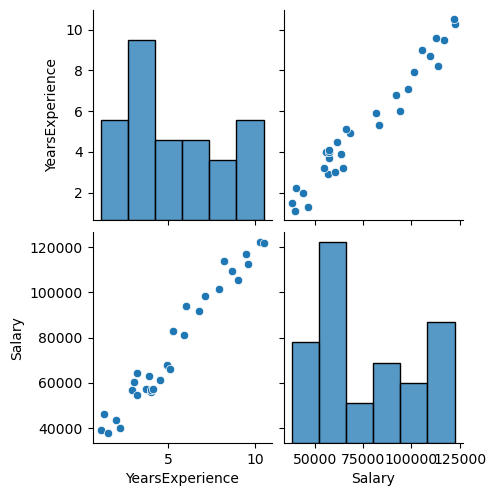

In [13]:
sns.pairplot(df)

<Axes: xlabel='YearsExperience', ylabel='Salary'>

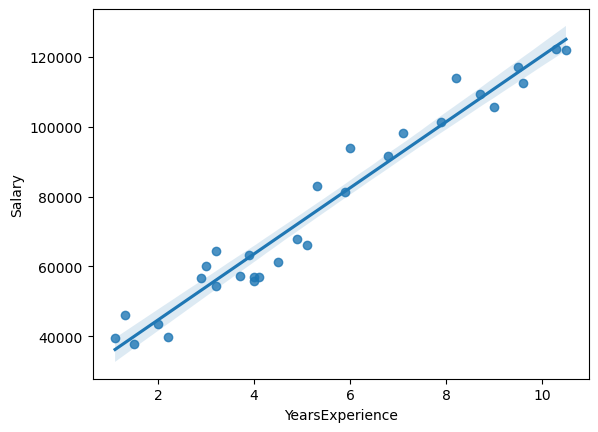

In [14]:
sns.regplot(data=df,x='YearsExperience',y='Salary')

In [15]:
X = df.drop('Salary',axis=1)
y = df['Salary']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=11,test_size=20)

In [18]:
X_train

,YearsExperience
18,5.9
7,3.2
1,1.3
12,4.0
13,4.1
23,8.2
17,5.3
27,9.6
16,5.1
25,9.0


In [19]:
X_test

,YearsExperience
15,4.9
8,3.2
6,3.0
26,9.5
3,2.0
11,4.0
14,4.5
21,7.1
9,3.7
5,2.9


In [20]:
y_train

18     81363
7      54445
1      46205
12     56957
13     57081
23    113812
17     83088
27    112635
16     66029
25    105582
Name: Salary, dtype: int64

In [21]:
y_test

15     67938
8      64445
6      60150
26    116969
3      43525
11     55794
14     61111
21     98273
9      57189
5      56642
10     63218
22    101302
2      37731
4      39891
20     91738
29    121872
19     93940
0      39343
28    122391
24    109431
Name: Salary, dtype: int64

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()

In [24]:
lr.fit(X_train,y_train)

LinearRegression()

In [25]:
lr.intercept_

26288.653077537972

In [26]:
lr.coef_

array([9233.58113509])

In [27]:
y_pred = lr.predict(X_test)

In [28]:
y_pred

array([ 71533.20063949,  55836.11270983,  53989.39648281, 114007.67386091,
        44755.81534772,  63222.97761791,  67839.76818545,  91847.07913669,
        60452.90327738,  53066.0383693 ,  62299.6195044 ,  99233.94404476,
        40139.02478018,  46602.53157474,  89077.00479616, 123241.254996  ,
        81690.13988809,  36445.59232614, 121394.53876898, 106620.80895284])

In [29]:
y_test

15     67938
8      64445
6      60150
26    116969
3      43525
11     55794
14     61111
21     98273
9      57189
5      56642
10     63218
22    101302
2      37731
4      39891
20     91738
29    121872
19     93940
0      39343
28    122391
24    109431
Name: Salary, dtype: int64

In [30]:
from sklearn import metrics

In [31]:
lr.score(X_test,y_test)

0.9664565446811775

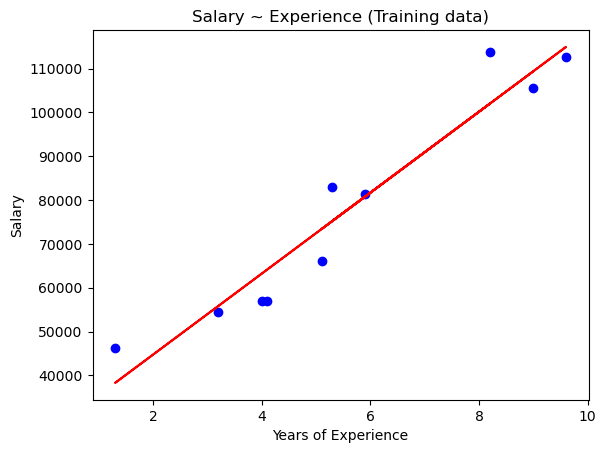

In [32]:
plt.scatter(X_train,y_train, color='blue')
plt.plot(X_train,lr.predict(X_train), color='red')
plt.title('Salary ~ Experience (Training data)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()